## Zaily Lopez 

## TASK # 3 - Build and Evaluate Models

## Contents
- [1. Cleaning and Pre-processing](#cleaning)
- [2. Covariance Estimation](#cov)
- [3. Exploratory Data Aalysis (EDA)](#eda)
    - [Histogram](#histogram)
    - [Line Plot](#line)
    - [Scatter Plot](#scatter)
    - [Box Plot](#box)
- [4. Feature Engineering (either PCA or RFE) and Dimensionality Reduction ](#pca)
- [5. Classification (Build three model and choose the best)](#models)
    - [5.1 Select the Feature](#data_feature)  
    - [5.2 Select the Dependent Variable](#depvar)  
    - [5.3 Cross Validation](#CrossV) 
    - [5.4 Sci-Kit Learn Format](#SCI) 
    - [5.5 Building the Models and Choosing the Right Model](#bmodels) 
        - [5.5.1 Model 1 - RFC ](#model1) 
        - [5.5.2 Model 2 - SVM Classifier ](#model2) 
        - [5.5.3 Model 3 - Neural Network ](#model3) 
        - [5.5.4 Model 4 - Linear Regression ](#model4) 
        - [5.5.5 Model 5 - Gradient Boosting](#model5) 
        - [5.5.6 Model 6 - Other Models from Plan of attack documentation](#model6) 
            - [5.5.6.1 Random Forest Regression Model Fitting and Scoring](#rf)  
            - [5.5.6.2 Support Vector Regression Model Fitting and Scoring](#svm)
            - [5.5.6.3 Linear Regression Model Fitting and Scoring](#lm)
    - [6. Model Tuning (Tune at least two parameters for each model you build)](#tunning)
    - [7. Model Evaluation](#eval)
        - [7.1 Model 1 - RFC ](#Emodel1) 
        - [7.2 Model 2 - SVM Classifier ](#Emodel2) 
        - [7.3 Model 3 - Neural Network ](#Emodel3) 
        - [7.4 Model 4 - Linear Regression ](#Emodel4) 
        - [7.5 Model 5 - Gradient Boosting](#Emodel5) 
        - [7.6 Model 6 - Other Models from Plan of attack documentation](#Emodel6) 
        - [7.7 Plotting the Results](#Rplot) 

   




<a name="cleaning"></a>
### 1. Cleaning and Pre-processing

In [1]:
#Imports from Module 3 
import math
import seaborn as sns 
%matplotlib inline
import numpy as np
import pandas as pd


#Imports from Module 3 
#imports 
#numpy, pandas, scipy, math, matplotlib
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVR, SVC
from sklearn import svm 
from sklearn import linear_model

from sklearn.preprocessing import StandardScaler, LabelEncoder


#model metrics 
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score

#cross validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
%matplotlib inline

#GradientBoostingClassifier 
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

from math import sqrt

In [2]:
#ds = pd.io.parsers.read_csv("default of credit card clients.csv")
raw = pd.read_csv('default of credit card clients.csv', header =1)


In [3]:
#In order to check the data types of each variable you can use the info() function of Pandas as follows:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

<a name="cov"></a>
## 2. Covariance Estimation

In [4]:
covMat = raw.cov()
print(covMat)

#TIP:
#Note: Notice that the 'ID' is shown in the matrix above?
#Be sure to use iloc when establishing your variable so you can select the specific 
#features/variables you want to measure.

                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1                   1.236447e+07  2.727020e+09 -1211.694332   
BILL_A

In [5]:
#1. Now that we've reviewed all of the basic components used in exploratory data analysis it is time for you to perform this analysis on all of the CreditOne data so you can fully understand the relevance of all features and how they impact one another and, most importantly, customer default.

#Here are some guidelines that will help you:

#For this task your EDA should resemble to depth of the Titanic EDA example provided in the resources.
#As you explore the data remember the whole purpose of EDA is to answer questions and summarize 
#the main points found in the data.
#This is done both with Statistical methods as well as visualization methods and we've only introduced 
#a few of both here to help you proceed.
#It is your job as a Data Scientist to provide the best solution for this problem.

<a name="eda"></a>
## 3. Exploratory Data Aalysis (EDA)

In [6]:
#Group by gender - Gender (1 = male; 2 = female)
raw.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

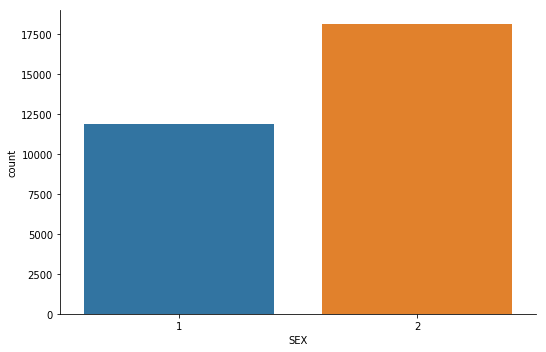

In [7]:
# Instead of a group by, use seaborn to plot the count of users for each sex
sx = sns.catplot('SEX', data=raw, kind='count', aspect=1.5)

#Majority are female 
#Gender (1 = male; 2 = female)

In [8]:
#Group by Education 
raw.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

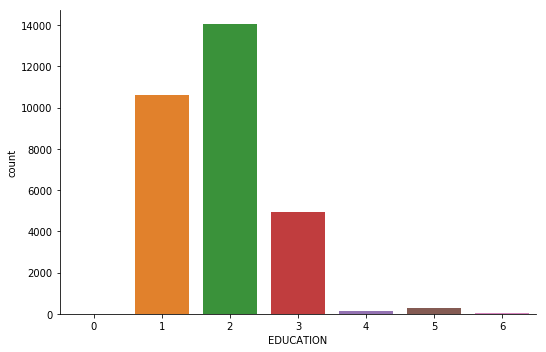

In [9]:
#Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).
ed = sns.catplot('EDUCATION', data=raw, kind='count', aspect=1.5)

#Majority University / Graduate School or High School.

In [10]:
#Group by Marital Status  
raw.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

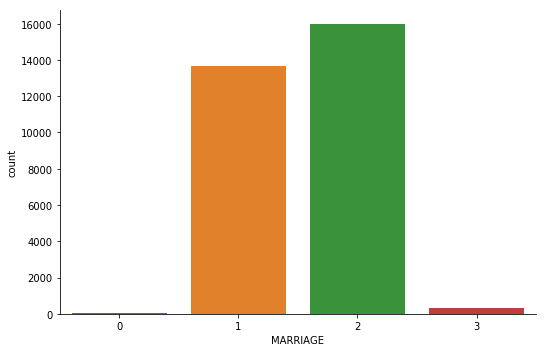

In [11]:
ma = sns.catplot('MARRIAGE', data=raw, kind='count', aspect=1.5)

#Majority Single or Married. 
#Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

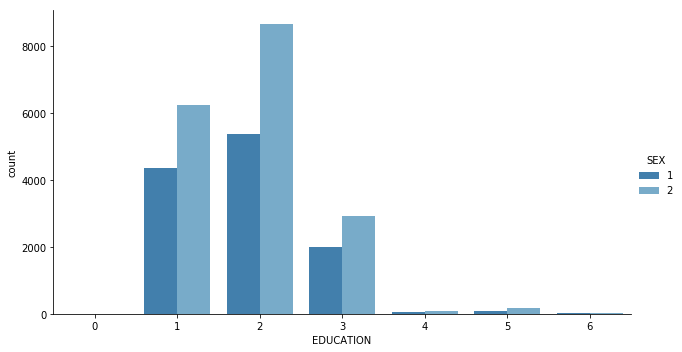

In [12]:
g = sns.catplot('EDUCATION', data=raw, hue='SEX', kind='count', aspect=1.75, palette="tab20c")
g.set_xlabels('EDUCATION')

In [13]:
# Number of customers with default payment next month in each education range group by sex 
raw.pivot_table('default payment next month', 'SEX', 'EDUCATION', aggfunc=np.sum, margins=True)

EDUCATION,0,1,2,3,4,5,6,All
SEX,,,,,,,,
1,0,906,1408,545,4,6,4,2873
2,0,1130,1922,692,3,12,4,3763
All,0,2036,3330,1237,7,18,8,6636


In [14]:
No_Default_Payment = raw[raw['default payment next month']==0]

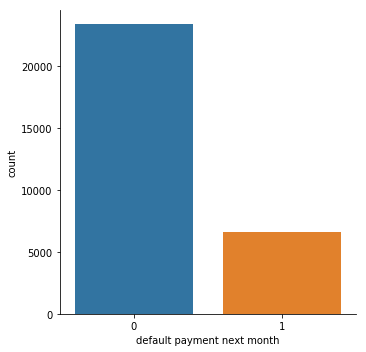

In [15]:
# Factor plot of those who have the default payment and who doesn't
sns.catplot('default payment next month', data=raw, kind='count')

#client's behavior; Y=0 then not default, Y=1 then default"
#Majority doesn't have the default payment

In [16]:
#total not default payment
len(No_Default_Payment)

23364

In [17]:
raw.AGE.describe()
#Average and median age of customers are 35 and 34 years old, respectively

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [18]:
# Drop missing values for the records in which age customer is missing
age = raw['AGE'].dropna()

Text(0.5, 1.0, "Distribution of Customers' Ages")

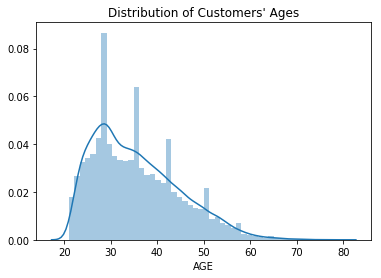

In [19]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Customers' Ages")

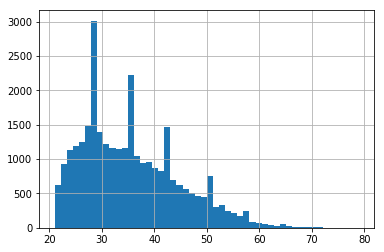

In [20]:
# Another way to plot a histogram of ages is shown below
raw['AGE'].hist(bins=50)

## kde plot, Distribution of Customer's Ages
## Grouped by Gender

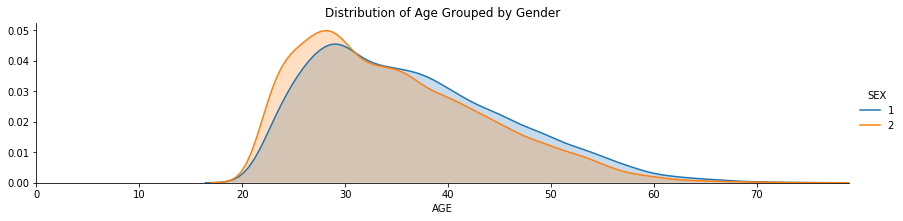

In [21]:
fig = sns.FacetGrid(raw, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = raw['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

### Grouped by Education

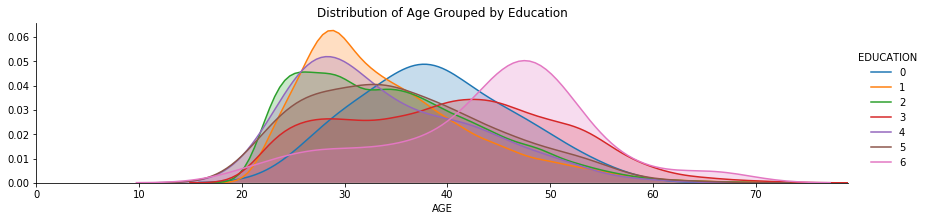

In [22]:
fig = sns.FacetGrid(raw, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = raw['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Education')
fig.add_legend()

<a name="histogram"></a>
### Histogram 

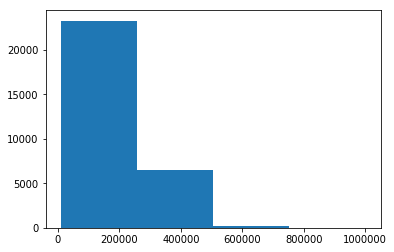

In [23]:
#Histogram 
plt.hist(raw['LIMIT_BAL'], bins=4)
plt.show()

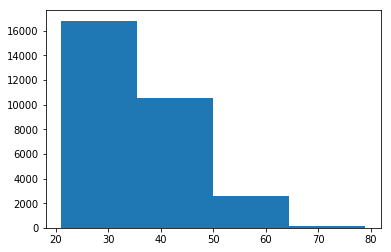

In [24]:
plt.hist(raw['AGE'], bins=4)
plt.show()

<a name="line"></a>
### Line Plot

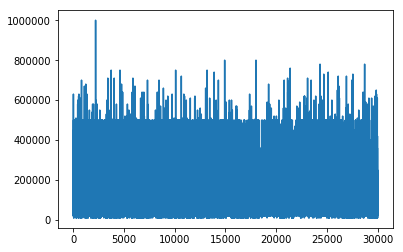

In [25]:
plt.plot(raw['LIMIT_BAL'])
plt.show()

#TIP:
#Note: There are numerous options for line plots (and all others). 
#Check the resources for additional information like adding axis and title information.

<a name="scatter"></a>
### Scatter Plots

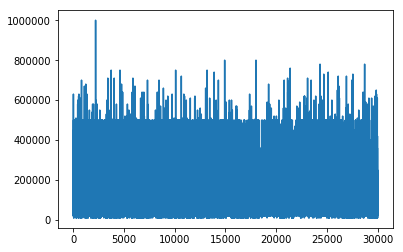

In [26]:
plt.plot(raw['LIMIT_BAL'])
plt.show()

#TIP:
#Note: There are numerous options for line plots (and all others). 
#Check the resources for additional information like adding axis and title information.

<a name="box"></a>
### Box Plots

In [27]:
header = raw.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


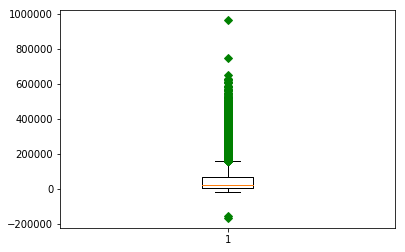

In [28]:
A = raw['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

#TIP:
#Note: There are numerous examples of box plots with matplotlib in the resources

<a name="pca"></a>
## 4. Feature Engineering (either PCA or RFE) and Dimensionality Reduction

In [29]:
#Data Dimensionality Reduction
bins = (20, 35, 60, 80)
group_names = ['Young', 'Adult', 'Old']
raw['AGE'] = pd.cut(raw['AGE'], bins = bins, labels = group_names)
raw['AGE'].unique()

[Young, Adult, Old]
Categories (3, object): [Young < Adult < Old]

In [30]:
label_quality = LabelEncoder()

In [31]:
raw['AGE'] = label_quality.fit_transform(raw['AGE'])

In [32]:
raw.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,2,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,2,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,2,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,0,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [33]:
raw.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [34]:
raw['AGE'].value_counts()

2    16809
0    12919
1      272
Name: AGE, dtype: int64

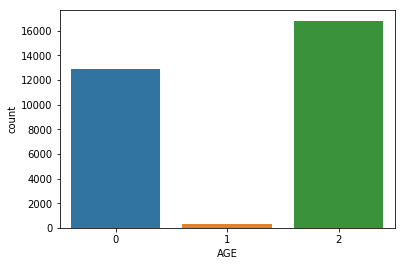

In [35]:
sns.countplot(raw['AGE'])

In [36]:
##Feature elimination
df = raw.drop(['ID', 'BILL_AMT4', 'BILL_AMT6'], axis=1) 
##removing variables like ID, and BILL_AMT4 and 6 due to correlation issues.

In [37]:
df['EDUCATION'].value_counts()

#df['EDUCATION'] = np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
#df['EDUCATION'] = np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])
#df['EDUCATION'] = np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])
#df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

<a name="models"></a>
## 5. Classification (Build three model and choose the best)

<a name="data_feature"></a>
### 5.1 Select the Feature

In [38]:
X = df.iloc[:,2:21]

X.head()

,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,1,2,2,2,-1,-1,-2,-2,3913,3102,689,0,0,689,0,0,0,0
1,2,2,2,-1,2,0,0,0,2,2682,1725,2682,3455,0,1000,1000,1000,0,2000
2,2,2,2,0,0,0,0,0,0,29239,14027,13559,14948,1518,1500,1000,1000,1000,5000
3,2,1,0,0,0,0,0,0,0,46990,48233,49291,28959,2000,2019,1200,1100,1069,1000
4,2,1,0,-1,0,-1,0,0,0,8617,5670,35835,19146,2000,36681,10000,9000,689,679


<a name="depvar"></a>
### 5.2 Select the Dependent Variable

In [39]:
#2. Select the Dependent Variable
#dependent variable
y = df['default payment next month']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

<a name="CrossV"></a>
### 5.3 Cross Validation

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

In [41]:
#Applying standard scaling to get optimized results 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [42]:
X.head()
#y.head()

,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,1,2,2,2,-1,-1,-2,-2,3913,3102,689,0,0,689,0,0,0,0
1,2,2,2,-1,2,0,0,0,2,2682,1725,2682,3455,0,1000,1000,1000,0,2000
2,2,2,2,0,0,0,0,0,0,29239,14027,13559,14948,1518,1500,1000,1000,1000,5000
3,2,1,0,0,0,0,0,0,0,46990,48233,49291,28959,2000,2019,1200,1100,1069,1000
4,2,1,0,-1,0,-1,0,0,0,8617,5670,35835,19146,2000,36681,10000,9000,689,679


<a name="SCI"></a>
### 5.4 Sci-Kit Learn Format

In [43]:
model = LinearRegression(n_jobs=10)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

<a name="bmodels"></a>
## 5.5 Building the Models and Choosing the Right Model

<a name="model1"></a>
### 5.5.1 Model 1 - RFC

In [44]:
#Model RFC
rfc = RandomForestClassifier(n_estimators=400)
#Model Fitting
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [45]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [46]:
print('Model1 - RFC score: ') 
rfc.score(X_train,y_train)
##The model score is 0.99 is very good but let's see how it perform

Model1 - RFC score: 


0.99025

In [47]:
#1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
#2nd value: The time for fitting the estimator on the train set for each cv split.
#3rd Value:  The time for scoring the estimator on the test set for each cv split.
print('Training score: ')
print(cross_val_score(rfc, X_train, y_train, cv=3)) 

Training score: 
[0.81539808 0.817375   0.81010126]


<a name="model2"></a>
### 5.5.2 Model 2 - SVM Classifier 

In [48]:
#Model SVM 
clf = svm.SVC(gamma='scale')
#Model Fitting
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [49]:
print('Model2 - SVM score: ') 
clf.score(X_train,y_train)
##The model score is 0.82

Model2 - SVM score: 


0.8258333333333333

In [50]:
#1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
#2nd value: The time for fitting the estimator on the train set for each cv split.
#3rd Value:  The time for scoring the estimator on the test set for each cv split.
print('Training score: ')
print(cross_val_score(clf, X_train, y_train, cv=3)) 

Training score: 
[0.82089739 0.820125   0.81785223]


<a name="model3"></a>
### 5.5.3 Model 3 - Neural Network 

In [51]:
#Model Neural Network
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
#Model Fitting
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [52]:
print('Model3 - Neural Network score: ') 
mlpc.score(X_train,y_train)
##The model score is 0.82

Model3 - Neural Network score: 


0.82425

In [53]:
#1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
#2nd value: The time for fitting the estimator on the train set for each cv split.
#3rd Value:  The time for scoring the estimator on the test set for each cv split.
print('Training score: ')
print(cross_val_score(mlpc, X_train, y_train, cv=3)) 

Training score: 
[0.81977253 0.814375   0.81435179]


<a name="model4"></a>
### 5.5.4 Model 4 - Linear Regression

In [54]:
#Model Linear Regression
lm = linear_model.LinearRegression()
#Model Fitting
lm.fit(X_train, y_train)
pred_lm = lm.predict(X_test)

In [55]:
print('Model4 - Linear Regression score: ') 
lm.score(X_train,y_train)
##The model score is 0.11

Model4 - Linear Regression score: 


0.11915630418005363

In [56]:
#1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
#2nd value: The time for fitting the estimator on the train set for each cv split.
#3rd Value:  The time for scoring the estimator on the test set for each cv split.
print('Training score: ')
print(cross_val_score(lm, X_train, y_train, cv=3)) 


Training score: 
[0.11524058 0.1184397  0.11742848]


<a name="model5"></a>
### 5.5.5 Model 5 - Gradient Boosting

In [57]:
#Model GB
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
#Model Fitting
clf_gb.fit(X_train, y_train)
pred_gb = clf_gb.predict(X_test)

In [58]:
print('Model5 - Gradient Boosting score: ') 
clf_gb.score(X_train,y_train)
##The model score is 0.82

Model5 - Gradient Boosting score: 


0.8216666666666667

<a name="model6"></a>
### 5.5.6 Model 6 - Other Models from Plan of attack documentation

In [59]:
modelSVR = SVR(gamma='scale')
modelRF = RandomForestRegressor(n_estimators=200)
modelLR = LinearRegression()

In [60]:
model.fit(X_train,y_train )
modelRF.fit(X_train,y_train)
modelSVR.fit(X_train,y_train)
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
#1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
#2nd value: The time for fitting the estimator on the train set for each cv split.
#3rd Value:  The time for scoring the estimator on the test set for each cv split. 
print('Training score: ')
print(cross_val_score(modelSVR, X_train, y_train, cv=3)) 

Training score: 
[0.13837872 0.1359458  0.12841889]


In [62]:
print('Training score: ')
print(cross_val_score(modelRF, X_train, y_train, cv=3)) 

Training score: 
[0.1767035  0.17770009 0.15391308]


In [63]:
print('Training score: ')
print(cross_val_score(modelLR, X_train, y_train, cv=3)) 

Training score: 
[0.11524058 0.1184397  0.11742848]


In [64]:
print ('Model RF Score: ') 
modelRF.score(X_train,y_train)

Model RF Score: 


0.8567500384477625

In [65]:
print ('Model SVR Score: ') 
modelSVR.score(X_train,y_train)

Model SVR Score: 


0.19900201181884136

In [66]:
print ('Model LR Score: ')
modelLR.score(X_train,y_train)

Model LR Score: 


0.11915630418005363

<a name="rf"></a>
#### 5.5.6.1 Random Forest Regression Model Fitting and Scoring

In [67]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train, cv=3))
modelRF.score(X_train,y_train)

[0.17578744 0.17814047 0.15284546]


0.856768883778877

<a name="svm"></a>
#### 5.5.6.2 Support Vector Regression Model Fitting and Scoring

In [68]:
#Model Fitting
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train, cv=3)) 
modelSVR.score(X_train,y_train)

[0.13837872 0.1359458  0.12841889]


0.19900201181884136

<a name="lm"></a>
#### 5.5.6.3 Linear Regression Model Fitting and Scoring

In [69]:
#Model Fitting
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train, cv=3)) 
modelLR.score(X_train,y_train)

[0.11524058 0.1184397  0.11742848]


0.11915630418005363

<a name="tunning"></a>
## 6. Model Tuning (Tune at least two parameters for each model you build)

<a name="Tmodel2"></a>
### 6.2 Model 2 - SVM Classifier 

In [70]:
#Model SVM 
clf = svm.SVC(kernel='rbf', gamma=10)
#Model Fitting
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

#Let's see how our model perform
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))
#precision of 0.83 for the neg values and 0.72 pos

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      4625
           1       0.58      0.09      0.15      1375

   micro avg       0.78      0.78      0.78      6000
   macro avg       0.68      0.53      0.51      6000
weighted avg       0.74      0.78      0.71      6000

[[4540   85]
 [1256  119]]


<a name="Tmodel3"></a>
### 6.3 Model 3 - Neural Network 

In [71]:
#Model Neural Network
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=1000)
#Model Fitting
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

#Let's see how our model perform
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))
#precision of 0.84 for the neg values and 0.68 

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4625
           1       0.67      0.37      0.48      1375

   micro avg       0.81      0.81      0.81      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.81      0.79      6000

[[4376  249]
 [ 862  513]]


<a name="Tmodel5"></a>
### 6.5 Model 5 - Gradient Boosting

In [72]:
#Model GB
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0)
#Model Fitting
clf_gb.fit(X_train, y_train)
pred_gb = clf_gb.predict(X_test)

#Let's see how our model perform
print(classification_report(y_test, pred_gb))
print(confusion_matrix(y_test, pred_gb))
##precision of 0.84 for the neg values and 0.70 for the positive values.


              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4625
           1       0.63      0.38      0.47      1375

   micro avg       0.81      0.81      0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000

[[4325  300]
 [ 859  516]]


<a name="eval"></a>
## 7. Model Evaluation

<a name="Emodel1"></a>
### 7.1 Model 1 - RFC

In [73]:
#Let's see how our model perform
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

##The model predicting has a precision of 0.83 for the neg values and 0.68 for the positive values. 

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4625
           1       0.68      0.36      0.47      1375

   micro avg       0.81      0.81      0.81      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.81      0.79      6000

[[4393  232]
 [ 881  494]]


<a name="Emodel2"></a>
### 7.2 Model 2 - SVM Classifier 

In [74]:
#Let's see how our model perform
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

##The model predicting has a precision of 0.83 for the neg values and 0.72 for the positive values.
##Better than the previous one. 

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      4625
           1       0.58      0.09      0.15      1375

   micro avg       0.78      0.78      0.78      6000
   macro avg       0.68      0.53      0.51      6000
weighted avg       0.74      0.78      0.71      6000

[[4540   85]
 [1256  119]]


<a name="Emodel3"></a>
### 7.3 Model 3 - Neural Network 

In [75]:
#Let's see how our model perform
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

##The model predicting has a precision of 0.84 for the neg values and 0.68 for the positive values.
##Better than the previous one.

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4625
           1       0.67      0.37      0.48      1375

   micro avg       0.81      0.81      0.81      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.81      0.79      6000

[[4376  249]
 [ 862  513]]


<a name="Emodel4"></a>
### 7.4 Model 4 - Linear Regression

In [76]:
#Let's see how our model perform
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred_lm))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, pred_lm))


Coefficients: 
 [-7.83679415e-03 -1.14206498e-02 -1.17531222e-02  1.09282283e-01
  2.13200151e-02  1.69181487e-02  1.58957648e-03  5.74960673e-03
  3.58530638e-03 -4.54553303e-02  1.32976351e-02 -1.97235095e-03
 -4.04235270e-04 -1.38742012e-02 -4.18089449e-03 -4.81576490e-05
 -3.49348760e-03 -5.07845750e-03 -2.26426617e-03]
Mean squared error: 0.15
Coefficient of determination: 0.14


<a name="Emodel5"></a>
### 7.5 Model 5 - Gradient Boosting

In [77]:
#Let's see how our model perform
print(classification_report(y_test, pred_gb))
print(confusion_matrix(y_test, pred_gb))
##The model predicting has a precision of 0.84 for the neg values and 0.70 for the positive values.
##Better than the previous one. 

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4625
           1       0.63      0.38      0.47      1375

   micro avg       0.81      0.81      0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000

[[4325  300]
 [ 859  516]]


<a name="Emodel6"></a>
### 7.6 Model 6 - Other Models from Plan of attack documentation

In [80]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.159
RMSE: 0.385


<a name="Rplot"></a>
### 7.7 Plotting the Results

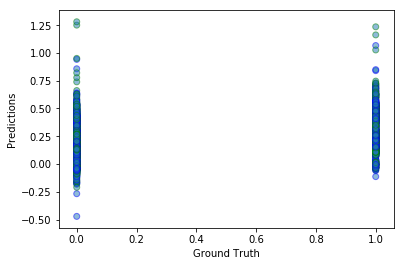

In [87]:
plt.scatter(y_test, pred_lm, edgecolor=['blue','green'], alpha=0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();
